![Quantus Telematika Indonesia](../../images/logo-construction-small.png)

# Supervised Machine Learning - Classification

## Load Library

In [2]:
# the big three
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# eli5
import eli5

# scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# yellowbrick
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

## Load Dataset

In [3]:
# membaca file csv
raw_data = pd.read_csv("./dataset/cancer/data.csv")

**Membaca Metadata**

In [4]:
# membaca metadata
with open('./dataset/cancer/data_description.txt', 'r') as f:
    teks = f.readlines()
    
for tulisan in teks:
    print(tulisan)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].



This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/



Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29



Attribute Information:



1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)



Ten real-valued features are computed for each cell nucleus:



a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) 

In [5]:
# melihat isi dari raw_data
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [6]:
# mengambil indeks kolom ke 1 sampai indeks paling akhir
kolom = raw_data.columns[1:]

# mengambil raw_data dari kolom yang sudah didefinisikan
raw_data = raw_data[kolom].copy()

In [7]:
raw_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


**Inspeksi Data**

In [ ]:
# cek summary
raw_data.describe()

In [ ]:
# Cek Nilai yang hilang
raw_data.isna().sum()

In [ ]:
# buat variabel baru dengan diagnosis difokuskan pada apakah
# tumor termasuk ganas atau tidak ('malignant' atau 'not malignant')
raw_data['diagnosis'] = pd.get_dummies(raw_data['diagnosis'])['M']

In [ ]:
# cek class imbalance
raw_data['diagnosis'].value_counts().plot.bar();

**Train-Test Splitting**

In [8]:
# train-test split
#di split dulu baru di imputasi
#kalsifikasi wajib random sampling
#menggunakan pandas
training_data = raw_data.groupby('diagnosis', group_keys=False).apply(lambda x: x.sample(frac = .8, random_state=1000)).copy()

training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
419,B,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.010760,0.1615,...,12.360,28.92,79.26,458.0,0.12820,0.11080,0.03582,0.04306,0.2976,0.07123
459,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.015410,0.010430,0.1621,...,10.670,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
420,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,...,13.070,26.98,86.43,520.5,0.12490,0.19370,0.25600,0.06664,0.3035,0.08284
225,B,14.340,13.47,92.51,641.2,0.09906,0.07624,0.057240,0.046030,0.2075,...,16.770,16.90,110.40,873.2,0.12970,0.15250,0.16320,0.10870,0.3062,0.06072
332,B,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,...,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
241,B,12.420,15.04,78.61,476.5,0.07926,0.03393,0.010530,0.011080,0.1546,...,13.200,20.37,83.85,543.4,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783
157,B,16.840,19.46,108.40,880.2,0.07445,0.07223,0.051500,0.027710,0.1844,...,18.220,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
561,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
398,B,11.060,14.83,70.31,378.2,0.07741,0.04768,0.027120,0.007246,0.1535,...,12.680,20.35,80.79,496.7,0.11200,0.18790,0.20790,0.05556,0.2590,0.09158
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [9]:
test_data = raw_data.drop(training_data.index)

test_data
#mendapatkan tes data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.1238,0.18660,0.241600,0.18600,0.2750,0.08902
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.1654,0.36820,0.267800,0.15560,0.3196,0.11510
11,M,15.780,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.066060,0.1842,...,20.420,27.28,136.50,1299.0,0.1396,0.56090,0.396500,0.18100,0.3792,0.10480
14,M,13.730,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.080250,0.2069,...,15.030,32.01,108.80,697.7,0.1651,0.77250,0.694300,0.22080,0.3596,0.14310
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.1440,0.17730,0.239000,0.12880,0.2977,0.07259
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.1324,0.11480,0.088670,0.06227,0.2450,0.07773
24,M,16.650,21.38,110.00,904.6,0.11210,0.14570,0.152500,0.091700,0.1995,...,26.460,31.56,177.00,2215.0,0.1805,0.35780,0.469500,0.20950,0.3613,0.09564
29,M,17.570,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,...,20.010,19.52,134.90,1227.0,0.1255,0.28120,0.248900,0.14560,0.2756,0.07919
33,M,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.165700,0.075930,0.1853,...,24.150,30.90,161.40,1813.0,0.1509,0.65900,0.609100,0.17850,0.3672,0.11230
40,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.020310,0.1784,...,15.930,30.25,102.50,787.9,0.1094,0.20430,0.208500,0.11120,0.2994,0.07146


In [10]:
# buat train set
X_train = training_data.iloc[:,1:].values
y_train = training_data['diagnosis'].values

# buat validation/test set
X_test = test_data.iloc[:,1:].values
y_test = test_data['diagnosis'].values
#scikit learn hanya menerima metrics

In [11]:
X_train

array([[1.116e+01, 2.141e+01, 7.095e+01, ..., 4.306e-02, 2.976e-01,
        7.123e-02],
       [9.755e+00, 2.820e+01, 6.168e+01, ..., 4.866e-02, 2.321e-01,
        7.211e-02],
       [1.157e+01, 1.904e+01, 7.420e+01, ..., 6.664e-02, 3.035e-01,
        8.284e-02],
       ...,
       [1.940e+01, 2.350e+01, 1.291e+02, ..., 1.564e-01, 2.920e-01,
        7.614e-02],
       [1.386e+01, 1.693e+01, 9.096e+01, ..., 1.654e-01, 3.630e-01,
        1.059e-01],
       [1.340e+01, 2.052e+01, 8.864e+01, ..., 2.051e-01, 3.585e-01,
        1.109e-01]])

In [12]:
y_train
#udah jadi vektor

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

## Bayes Classifier

Bayes Classifier (disebut juga *Naive Bayes Classifier*) adalah salah satu model machine learning yang mana menginsyaratkan tidak adanya keterkaitan antar fitur.

### Dasar Teori

Classifier Bayes dirumuskan berdasarkan Teorema Bayes berikut:

Misalkan terdapat dua kejadian $A$ dan $B$. Kita dapat mengkaitkan masing-masing probabilitas dari dua kejadian ini, $P(A)$ dan $P(B)$, dengan probabilitas kondisional $P(A|B)$ dan $P(B|A)$ berdasarkan aturan berikut:

$$
P(A \cap B) = P(A|B)P(B)
$$

atau

$$
P(B \cap A) = P(B|A)P(A)
$$

Karena

$$P(A \cap B) = P(B \cap A)$$

maka persamaan diatas dapat ditulis kembali sebagai:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

**Mengapa Menggunakan Naive Bayes**

- Cepat
- Hanya membutuhkan sedikit parameter
- Out-of-core learning

**Mengapa Tidak Menggunakan Naive Bayes**

- Base model

In [ ]:
#A = terget kelas
#B = 

## Naive Bayes pada Scikit-Learn

Terdapat 3 implementasi Naive Bayes pada Scikit-Learn, diantaranya:

- Bernoulli Naive Bayes (```BernoulliNB```)
- Multinomial Naive Bayes (```MultinomialNB```)
- Gaussian Naive Bayes (```GaussianNB```)
- Complement Naive Bayes (```ComplementNB```)

In [ ]:
#dilihat dari distribusi dulu (Bernoulli) yang hanya diskrit, cocok pesan singakt
#data diskrit, bisa klasifikasi dua multiclass
#khusus untuk data2 tipe numerik
#

### Bernoulli Naive Bayes

Bernoulli Naive Bayes digunakan jika sebaran data mengikuti distribusi Bernoulli.

**Kapan Menggunakan Bernoulli Naive Bayes**

- Ketika tiap fitur dalam matriks bernilai biner 0-1. Misalnya bernilai 0 jika kata tersebut tidak ada di dalam teks, dan 1 jika kata tersebut ada di dalam teks.
- Cocok untuk klasifikasi pesan singkat

### Multinomial Naive Bayes

Multinomial Naive Bayes digunakan untuk data yang sifatnya diskrit.

**Kapan Menggunakan Multinomial Naive Bayes**

- Ketika tiap fitur dalam matriks memiliki nilai diskrit, misalnya dari hasil counting.
- Cocok untuk klasifikasi teks

### Gaussian Naive Bayes

Gaussian Naive Bayes digunakan untuk data dengan fitur numerik.

**Kapan Menggunakan Gaussian Naive Bayes**

- Ketika tiap fitur dalam matriks memiliki nilai numerik

**Syntax GaussianNB**

```python
GaussianNB(priors=None, var_smoothing=1e-09)
```

Keterangan:

- ```priors```: Probabilitas prior dari kelas.
- ```var_smoothing```: Proporsi variansi terbesar dari seluruh variabel yang digunakan untuk modeling 

Keterangan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

### Penerapan Model Gaussian Naive Bayes

In [ ]:
# load modul GaussianNB
from sklearn.naive_bayes import GaussianNB

# inisiasi model
model_nb_gaussian = GaussianNB()

# fitting model
model_nb_gaussian.fit(X_train, y_train)

# buat hasil prediksi
hasil_prediksi = model_nb_gaussian.predict_proba(X_test)

# lihat hasil prediksi
hasil_prediksi

In [13]:
nilai_prediksi = []
for hasil in hasil_prediksi:
    if hasil [1] >= 0.5:
        nilai_prediksi.append(1)
    else:
        nilai_prediksi.append(0)

NameError: name 'hasil_prediksi' is not defined

In [14]:
hasil_prediksi = np.array(nilai_prediksi)

**Model Evaluation**

**Cek Akurasi**

In [15]:
accuracy_score(y_test, hasil_prediksi)

ValueError: Found input variables with inconsistent numbers of samples: [113, 0]

**Catatan** 

*Accuracy (Akurasi)*

Akurasi adalah salah satu metrik yang biasa digunakan dalam menghitung seberapa baik model yang dibuat dalam memprediksi.

$$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative}$$

**Confusion Matrix**

In [16]:
confusion_matrix(y_test, hasil_prediksi)
#malignan = 66 True negatif, 5 = False negative
#

ValueError: Found input variables with inconsistent numbers of samples: [113, 0]

**Catatan**

*Confusion Matrix*

Confusion Matrix digunakan untuk melakukan tabulasi silang terhadap hasil antara nilai sebenarnya dengan nilai prediksi.


```python
array([[66,  5],
       [ 6, 36]])
```

Maka:

- True Negative: 66 #prediksi dan aktual True
- False Positive: 5 #prediksi True aktual False 
- False Negative: 6 #prediksi False aktual True 
- True Positive: 36 #prediksi True aktual True

**Classification Report**

In [ ]:
pd.DataFrame(classification_report(y_test, hasil_prediksi, target_names=['0','1'], output_dict=True))

**Catatan**

![Precision Recall](./images/meme-1.jpg)

*precision*

precision adalah

$$\frac{True Positive}{True Positive + False Positive}$$

*recall* (atau Sensitivity)

recall adalah

$$\frac{True Positive}{True Positive + False Negative}$$

*f1-score*

f1-score adalah 

$$2\times(\frac{precision \times recall}{precision+recall})$$

Makin besar nilainya makin baik.





In [ ]:
#precision, dari keseluruhan yang ditebak kanker mana yang kena kanker betulan
#recall dari banyak yang benar kena kanker, seberapa persen yang benar ditebak kanker 
#f1 score, gabungan

In [ ]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

In [ ]:
confusion_matrix(y_true, y_pred)

**Model Inspection**

In [ ]:
pd.DataFrame({
    "Kelas": [0,1],
    "Probabilitas": model_nb_gaussian.class_prior_
}).plot.bar('Kelas','Probabilitas');
#bisa kita hintung sendiri atau oleh mereka
#jauh lebih mudah memprediksi yang non malignant

In [ ]:
pd.DataFrame({
    "Fitur": training_data.iloc[:,1:].columns,
    "Rerata fitur terhadap kelas Malignant": model_nb_gaussian.theta_[1]
}).sort_values(by='Rerata fitur terhadap kelas Malignant', ascending=False)

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

In [ ]:
visualizer = ROCAUC(model_nb_gaussian, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

In [ ]:
#menghitung tre

### Catatan Terkait ROC-AUC

ROC adalah suatu plot yang terdiri dari nilai True Positive Rate (Sensitivity) dan False Positive Rate, dimana

$$False Positive Rate = \frac{False Positive}{False Positive + True Negative}$$

Sedangkan AUC adalah luas area dibawah kurva ROC. AUC dapat dipakai untuk mengukur seberapa baik performa dari model. Semakin mendekati 1 semakin baik.


**Precision-Recall Curve**

In [ ]:
viz = PrecisionRecallCurve(model_nb_gaussian)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

**Catatan**

*Precision-Recall Curve*

*Precision-Recall Curve* adalah kurva yang dibentuk dari nilai precision dan recall. Biasanya dipakai untuk menentukan seberapa baik performa dari model terutama jika terjadinya imbalance class.

*Average Precision* adalah salah satu cara untuk untuk menghitung seberapa baik performa dari model jika kita menggunakan Precision-Recall Curve. Average Precision dirumuskan sebagai berikut:

$$Average Precision = \Sigma_{n}(Recall_{n} - Recall_{n-1}) \times Precision_{n}$$


In [ ]:
#tergantung case, untuk yang beresiko tinggi kena kanker maka menggunakan Precision-Recall Curve
#precision fokusin ke orang yang kena kanker 

### Complement Naive Bayes

Complement Naive Bayes mirip dengan multinomial naive Bayes, hanya saja digunakan untuk kasus dimana data memiliki kelas target yang tidak imbang (*imbalance*).

**Kapan Menggunakan Complement Naive Bayes**

- Ketika kelas target tidak seimbang

**Syntax ComplementNB**

```python
ComplementNB(alpha=1.0, fit_prior=True, class_prior=None, norm=False)
```

Keterangan: 

- ```alpha```: Penggunaan smoothing parameter. Berfungsi untuk mencegah nilai probabilitas bernilai 0 karena variabel yang dipakai model berbeda dengan data aslinya.
- ```fit_prior```: Hanya digunakan jika terdapat 1 kelas saja pada kelas target.
- ```class_prior```: Probabilitas prior untuk tiap kelas target.

Keterangan lebih lanjut: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html

### Penerapan Model Naive Bayes

In [17]:
# load modul GaussianNB
from sklearn.naive_bayes import ComplementNB

# inisiasi model
model_nb_complement = ComplementNB(fit_prior=False)

# fitting model
model_nb_complement.fit(X_train, y_train)

# buat hasil prediksi
hasil_prediksi = model_nb_complement.predict(X_test)

# lihat hasil prediksi
hasil_prediksi

array(['M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M'], dtype='<U1')

**Evaluasi Hasil Prediksi**

**Cek Akurasi**

In [18]:
accuracy_score(y_test, hasil_prediksi)

0.8849557522123894

**Confusion Matrix**

In [19]:
confusion_matrix(y_test, hasil_prediksi)

array([[67,  4],
       [ 9, 33]])

**Classification Report**

In [20]:
pd.DataFrame(classification_report(y_test, hasil_prediksi, target_names=['0','1'], output_dict=True))

,0,1,micro avg,macro avg,weighted avg
f1-score,0.911565,0.835443,0.884956,0.873504,0.883272
precision,0.881579,0.891892,0.884956,0.886735,0.885412
recall,0.943662,0.785714,0.884956,0.864688,0.884956
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

In [21]:
pd.DataFrame({
    "Variabel": training_data.iloc[:,1:].columns,
    "Weight": model_nb_complement.coef_[0]
}).sort_values(by='Weight', ascending=False)
#fractal dimension lebih penting

,Variabel,Weight
19,fractal_dimension_se,12.118734
14,smoothness_se,11.691697
17,concave points_se,11.488138
15,compactness_se,10.879352
18,symmetry_se,10.878500
16,concavity_se,10.717430
7,concave points_mean,10.703871
6,concavity_mean,10.184602
9,fractal_dimension_mean,9.863398
27,concave points_worst,9.707098


In [22]:
pd.DataFrame({
    "Variabel":training_data.iloc[:,1:].columns,
    "Empirical Weight": model_nb_complement.feature_log_prob_[1]
}).sort_values(by='Empirical Weight', ascending=False)
#lebih kenilai probabilitas 

,Variabel,Empirical Weight
19,fractal_dimension_se,12.118734
14,smoothness_se,11.691697
17,concave points_se,11.488138
15,compactness_se,10.879352
18,symmetry_se,10.878500
16,concavity_se,10.717430
7,concave points_mean,10.703871
6,concavity_mean,10.184602
9,fractal_dimension_mean,9.863398
27,concave points_worst,9.707098


**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

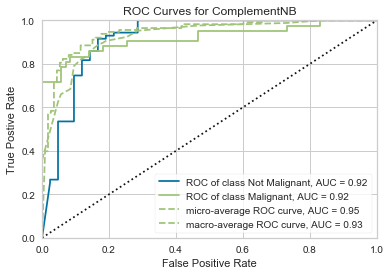

In [23]:
visualizer = ROCAUC(model_nb_complement, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curve**

ValueError: Data is not binary and pos_label is not specified

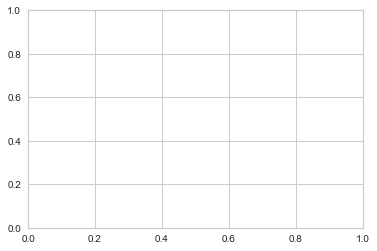

In [24]:
viz = PrecisionRecallCurve(model_nb_complement)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Logistic Regression



![Logistic Regression](./images/logistic_regression.png)

Sumber Gambar: https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7

### Dasar Teori

Logistic Regression adalah salah satu model parametrik yang menggunakan fungsi logistik untuk melakukan fitting pada data:

$$f(\bar{x},\bar{w}) = \frac{1}{1+e^{-\bar{x}\bar{w}}}$$


**Kapan Menggunakan Logistic Regression**

- Jika data yang dipakai untuk pemodelan tidak terlalu besar
- Sebagai base model

**Syntax LogisticRegression**

```python
LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```

Keterangan:

- ```penalty```: Pemilihan fungsi norm yang digunakan untuk *penalization*. Pilihannya adalah ```l1```, ```l2```, ```elasticnet``` dan ```none```
- ```dual```: Formulasi "dual" atau "primal".
- ```tol```: Nilai toleransi error
- ```C```: Berfungsi untuk *regularization* untuk menghindari kasus *overfitting*
- ```fit_intercept```: Apakah menggunakan *intercept* atau tidak.
- ```class_weight```: Memberikan pembobotan pada kelas target.
- ```random_state```: Berfungsi untuk melakukan seeding pada RNG.
- ```solver```: Algoritma yang digunakan untuk fitting model.
    - Gunakan ‘liblinear’ untuk dataset kecil, gunakan ‘sag’ dan ‘saga’ untuk data ukuran besar.
    - Untuk kasus multiclass, gunakan ‘newton-cg’, ‘sag’, ‘saga’ dan ‘lbfgs’ untuk multinomial.
    - ‘newton-cg’, ‘lbfgs’, ‘sag’ dan ‘saga’ dapat melakukan regularisasi L2 atau tanpa penalti
    - ‘liblinear’ dan ‘saga’ dapat melakukan regularisasi menggunakan L1
    - ‘saga’ dapat menggunakan regularisasi menggunakan ‘elasticnet’
    - ‘liblinear’ harus menggunakan penalti
- ```max_iter```: Iterasi maksimal
- ```multi_class```: Apakah kasusnya binary atau multiclass.
    - Gunakan ‘ovr’ untuk kasus binary
    - Gunakan ‘multinomial’ untuk kasus multiclass
    - Gunakan 'auto' untuk memilih secara otomatis tergantung dari kelas targetnya
- ```n_jobs```: Jumlah core CPU yang digunakan untuk pemodelan

Sisanya dapat dibaca di: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
#penalty :menghindari 

### Penerapan Model Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

model_logistic_reg = LogisticRegression(random_state=1000, solver='liblinear', multi_class='ovr')

In [26]:
# fitting model
model_logistic_reg.fit(X_train, y_train)

# buat hasil prediksi
hasil_prediksi = model_logistic_reg.predict(X_test)

# lihat hasil prediksi
hasil_prediksi

array(['M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M'], dtype=object)

**Evaluasi Model**

**Akurasi**

In [27]:
accuracy_score(y_test, hasil_prediksi)

0.9380530973451328

**Confusion Matrix**

In [28]:
confusion_matrix(y_test, hasil_prediksi)

array([[68,  3],
       [ 4, 38]])

**Classification Report**

In [29]:
pd.DataFrame(classification_report(y_test, hasil_prediksi, output_dict=True))

,B,M,micro avg,macro avg,weighted avg
f1-score,0.951049,0.915663,0.938053,0.933356,0.937897
precision,0.944444,0.926829,0.938053,0.935637,0.937897
recall,0.957746,0.904762,0.938053,0.931254,0.938053
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

**Coefficients Weight**

In [ ]:
nama_feature = training_data.iloc[:,1:].columns.tolist()

In [ ]:
eli5.explain_weights(model_logistic_reg, feature_names=nama_feature)

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

In [ ]:
visualizer = ROCAUC(model_logistic_reg, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curves**

In [ ]:
viz = PrecisionRecallCurve(model_logistic_reg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## K-Nearest Neighbors

![KNN](./images/knn_.png)

Sumber Gambar: https://www.kdnuggets.com/2019/07/classifying-heart-disease-using-k-nearest-neighbors.html

### Dasar Teori

K-Nearest Neighbors (KNN) adalah salah satu model machine learning non-parametrik dimana model menggunakan posisi dari tiap titik data pada saat training untuk mengklasifikasikan data yang baru.

Karena posisi titik sangat diperhitungkan, maka KNN bergantung kepada fungsi jarak yang digunakan dalam pemodelan, diantaranya:

**Jarak Manhatan (*Manhatan Distance*)**

$$d(x,y) = \Sigma_{i=1}^{k} |x_{i} - y_{i}|$$

**Jarak Euclidean (*Euclidean Distance*)**

$$d(x,y) = \sqrt{\Sigma_{i=1}^{k} (x_{i} - y_{i})^{2}}$$

**Jarak Minkowski (*Minkowski Distance*)**

$$d(x,y) = (\Sigma_{i=1}^{k} (x_{i} - y_{i})^{p})^{p}$$

**Kapan Menggunakan K-Nearest Neighbors**

- Base model

**Syntax KNeighborsClassifier**

```python
KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, p=2, metric=’minkowski’, n_jobs=None)
```

Keterangan: 

- ```n_neigbors```: Jumlah titik yang digunakan untuk menentukan kelas dari data yang baru.
- ```weights```: Pembobotan yang dipakai untuk melakukan prediksi. Terdapat 2 pilihan, yaitu:
    - ```uniform```: Setiap titik diperlakukan sama
    - ```distance```: Setiap titik diberi bobot berdasarkan inverse jarak.
- ```algorithm```: Algoritma yang dipakai untuk menghitung nilai ketetanggaan antar titik. Terdapat 4 pilihan:
    - ```balll_tree```
    - ```kd_tree```
    - ```brute```
    - ```auto```
- ```p```: Derajat atau pangkat yang digunakan untuk menghitung jarak antar titik berdasarkan rumus jarak Minkowski. 
    - Jika ```p=1```, maka jarak yang digunakan jarak Manhatan
    - Jika ```p=2```, maka jarak yang digunakan jarak Euclidean
- ```metric```: Fungsi jarak yang dipakai untuk menghitung jarak antar titik
- ```n_jobs```: Berapa banyak CPU yang digunakan untuk membuat model.

**Penerapan Model K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto')

model_knn.fit(X_train, y_train)

hasil_prediksi = model_knn.predict(X_test)

hasil_prediksi

**Evaluasi**

In [ ]:
accuracy_score(y_test, hasil_prediksi)

In [ ]:
confusion_matrix(y_test, hasil_prediksi)

In [ ]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

**Model Inspection**

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

In [ ]:
visualizer = ROCAUC(model_knn, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precission-Recall Curve**

In [ ]:
viz = PrecisionRecallCurve(model_knn)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Decision Tree

![Decision Tree](./images/decision_tree.png)

Sumber Gambar: https://www.displayr.com/what-is-a-decision-tree/

### Dasar Teori

Decision Tree adalah salah satu model machine learning non parametrik yang didasarkan pada pembentukan pohon keputusan. Model ini dibangun dengan cara menentukan root node, lalu membentuk cabang-cabang keputusan yang dibuat berdasarkan ukuran tertentu yang disebut sebagai *split criteria* atau *impurity measures*. Hasil yang diperoleh dari decision tree bisa berupa aturan-aturan yang dapat diinterpretasikan ke dalam bahasa manusia sehingga model decision tree lebih mudah dipahami oleh orang awam sekalipun.

**Beberapa *Split Criteria/Impurity Measures***

![Impurity Measures](./images/impurity.png)


**Kapan Menggunakan Decision Tree**

- Ketika membutuhkan model yang memiliki performa lebih baik dibanding base model dan mudah diinterpretasikan
- Ketika masalah yang ingin diselesaikan adalah masalah bisnis dimana membutuhkan panduan dalam membuat keputusan

**Syntax DecisionTreeClassifier**

```python
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
```

Keterangan:

- ```criterion```: ukuran yang dipakai untuk melakukan split pada node, terdapat dua pilihan yaitu 'gini' untuk penggunaan gini index dan 'entropy' untuk penggunaan information gain.
- ```splitter```: strategi yang digunakan untuk split pada tiap node, terdapat dua pilihan yaitu 'best' dan 'random'.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=1000)

model_decision_tree.fit(X_train, y_train)

hasil_prediksi = model_decision_tree.predict(X_test)

hasil_prediksi

**Model Evaluation**

In [ ]:
accuracy_score(y_test, hasil_prediksi)

In [ ]:
confusion_matrix(y_test, hasil_prediksi)

In [ ]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

**Model Inspection**

**Feature Importance & Rules**

In [ ]:
eli5.sklearn.explain_decision_tree(model_decision_tree, feature_names=training_data.iloc[:,1:].columns.tolist())

**Tree Visualization**

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(model_decision_tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
import graphviz

In [ ]:
graphviz.

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

In [ ]:
visualizer = ROCAUC(model_decision_tree, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precission-Recall Curve**

In [ ]:
viz = PrecisionRecallCurve(model_decision_tree)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## AdaBoost

![AdaBoost](./images/adaboost.png)

Sumber Gambar: https://medium.com/swlh/boosting-and-bagging-explained-with-examples-5353a36eb78d


**Kapan Menggunakan AdaBoost**

- Ketika akurasi lebih diutamakan dibanding interpretabilitas.
- Mencari tahu mana variabel yang lebih penting dibanding variabel lainnya menggunakan feature importance.

**Syntax AdaBoostClassifier**

```python
AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
```

Keterangan:

- ```base_estimator```: Estimator yang digunakan untuk membuat model.
- ```n_estimators```: Banyak estimator yang dibuat.
- ```learning_rate```: Berfungsi untuk memperkecil kontribusi tiap estimator yang dibuat.
- ```algorithm```: Algoritma yang digunakan untuk. Terdapat dua pilihan, yaitu 'SAMME' dan 'SAMME.R'
- ```random_state```: Berfungsi untuk seeding random number generator

In [30]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(random_state=1000)

model_adaboost.fit(X_train, y_train)

hasil_prediksi = model_adaboost.predict(X_test)

hasil_prediksi

array(['M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M'], dtype=object)

**Model Evaluation**

In [32]:
accuracy_score(y_test, hasil_prediksi)

0.9734513274336283

In [33]:
confusion_matrix(y_test, hasil_prediksi)

array([[69,  2],
       [ 1, 41]])

In [36]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

,B,M,micro avg,macro avg,weighted avg
f1-score,0.978723,0.964706,0.973451,0.971715,0.973513
precision,0.985714,0.953488,0.973451,0.969601,0.973737
recall,0.971831,0.976190,0.973451,0.974011,0.973451
support,71.000000,42.000000,113.000000,113.000000,113.000000


**Model Inspection**

**Feature Importance**

In [38]:
eli5.explain_weights(model_adaboost , feature_names=training_data.iloc[:,1:].columns.tolist())

Weight,Feature
0.1000 ± 0.6000,texture_worst
0.1000 ± 0.6000,area_se
0.0800 ± 0.5426,smoothness_worst
0.0800 ± 0.5426,area_worst
0.0600 ± 0.4750,texture_mean
0.0600 ± 0.4750,concavity_worst
0.0600 ± 0.4750,compactness_mean
0.0600 ± 0.4750,perimeter_worst
0.0400 ± 0.3919,texture_se
0.0400 ± 0.3919,smoothness_mean


**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

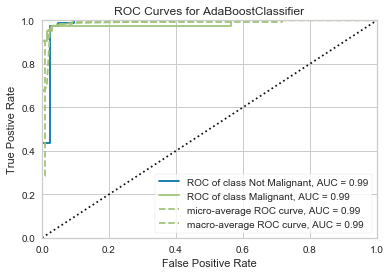

In [35]:
visualizer = ROCAUC(model_adaboost, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curve**

ValueError: Data is not binary and pos_label is not specified

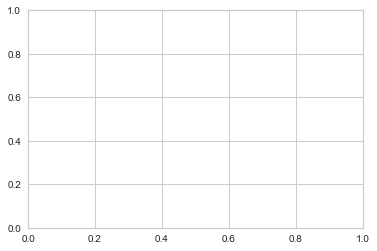

In [39]:
viz = PrecisionRecallCurve(model_adaboost)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Random Forest

![Random Forest](./images/random_forest.png)

Sumber gambar: https://www.machinehack.com/course/machinehack-practise-5-random-forest-regression/

In [ ]:
#regresi dan numerik maka hasilnya di average dulu

**Kapan Menggunakan Random Forest**

**Syntax RandomForest**

```python
RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
```

Keterangan:

- ```n_estimators```: Jumlah pohon yang dibuat.
- ```criterion```: Kriteria yang digunakan untuk melakukan split pada node. Terdapat dua pilihan, diantaranya 'gini' untuk penggunaan gini index dan 'entropy' untuk penggunaan information gain.
- ```max_depth```: Seberapa banyak node yang akan dibentuk. Semakin besar maka semakin dalam pohon yang dibuat.
- ```min_sample_split```: Jumlah sampel minimum yang digunakan node untuk split.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_randomforest = RandomForestClassifier(n_estimators=100, random_state=1000, max_depth=4)

model_randomforest.fit(X_train, y_train)

hasil_prediksi = model_randomforest.predict(X_test)

hasil_prediksi

**Model Evaluation**

In [ ]:
accuracy_score(y_test, hasil_prediksi)

In [ ]:
confusion_matrix(y_test, hasil_prediksi)

In [ ]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

**Model Inspection**

**Feature Importance**

In [ ]:
eli5.sklearn.explain_rf_feature_importance(model_randomforest, feature_names=training_data.iloc[:,1:].columns.tolist())

**Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)**

In [ ]:
visualizer = ROCAUC(model_randomforest, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curve**

In [ ]:
viz = PrecisionRecallCurve(model_randomforest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Gradient Boosting Tree

![Gradient Boosting Tree](./images/gradient_boosting_tree.png)

Sumber gambar: https://bradleyboehmke.github.io/HOML/gbm.html

**Kapan Menggunakan Gradient Boosting Tree**

**Syntax GradientBoostingClassifier**

```python
GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
```

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1000)

model_gradient_boosting.fit(X_train, y_train)

hasil_prediksi = model_gradient_boosting.predict(X_test)

hasil_prediksi

**Model Evaluation**

In [ ]:
accuracy_score(y_test, hasil_prediksi)

In [ ]:
confusion_matrix(y_test, hasil_prediksi)

In [ ]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

**Model Inspection**

In [ ]:
eli5.explain_weights(model_gradient_boosting, feature_names=training_data.iloc[:,1:].columns.tolist())

Receiver Operating Characteristic (ROC) & Area Under Curve (AUC)

In [ ]:
visualizer = ROCAUC(model_gradient_boosting, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

**Precision-Recall Curve**

In [ ]:
viz = PrecisionRecallCurve(model_randomforest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()

## Support Vector Machine

![SVM](./images/svm.png)

Sumber gambar: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

**Kapan Menggunakan SVM**

**Syntax SVC**

```python
SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
```



In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', gamma = 'scale', random_state=1000, probability=True)

model_svm.fit(X_train, y_train)

hasil_prediksi = model_svm.predict(X_test)

hasil_prediksi

**Model Evaluation**

In [ ]:
accuracy_score(y_test, hasil_prediksi)

In [ ]:
confusion_matrix(y_test, hasil_prediksi)

In [ ]:
pd.DataFrame(
classification_report(y_test, hasil_prediksi, output_dict=True)
)

**Model Inspection**

In [ ]:
eli5.explain_weights(model_svm, feature_names=nama_feature)

In [ ]:
visualizer = ROCAUC(model_svm, classes=['Not Malignant', 'Malignant'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.finalize()

In [ ]:
viz = PrecisionRecallCurve(model_randomforest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.finalize()